# Is your Time Series white noise ?

Refs:   
https://otexts.com/fpp2/wn.html  
Machine Learning Mastery Jason Brownlee


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm 

from random import gauss, normalvariate
from random import seed 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
# Some basic settings, shall we. 
sns.set(rc={'figure.figsize':(25,10)}) # figure sizes
sns.set_style("whitegrid") # setting the style 

## Definition of White Noise

* A time series where your data is a sequence of random numbers and CANNOT be predicted.  
* There is 0 correlation between the values in the series, meaning there is 0 auto-correlation. 

***

## Why is it important?

### 1. Helps to determine if your TS (data) is predictable

* If your TS is white noise, by definition it is not predictable and cannot be used for predictive modeling.



    
### 2. Helps determine model quality

* Once you've created a model, you can determine its quality by examining if the forecast ERRORS are white noise. 
    - If they are it means your model captured all the structure in your data that it could 
    - If it isn't white noise, your model STILL needs to capture additional temporal structure/signal in the data and CAN BE IMPROVED.
    
***

## Characteristics of White noise.

Should have : 
    
1. ZER0 Mean 
2. ZER0 autocorrelation
3. CONSTANT variance ie. NO change over time

In [4]:
# real data 
daily_temps = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, squeeze=True, parse_dates=True)
shampoo_sales = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, squeeze=True, parse_dates=True)
sunspots = pd.read_csv('sunspots.csv', parse_dates=True, dayfirst=False, index_col=0)


# Manufactured WHite noise (we will check our data against this)
seed(1)
synthetic_wn = pd.Series([normalvariate(mu = 0.0, sigma=1.0) for i in range(1000)])
# Will have some random variation and mean will not be exactly 0

### Summary Statistics

In [5]:
# 1. try and compare Summary stats for all of the above datasets

# 2. Compare GLOBAL VS LOCAL Stats as well. (all time vs different subsections of time)

synthetic_wn.describe()

count    1000.000000
mean       -0.056336
std         1.017058
min        -2.824381
25%        -0.736914
50%         0.007960
75%         0.659895
max         3.662076
dtype: float64

In [6]:
shampoo_sales.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

<br/>

<font color = 'darkorange' size = '5'>CHECK VISUALLY </font>

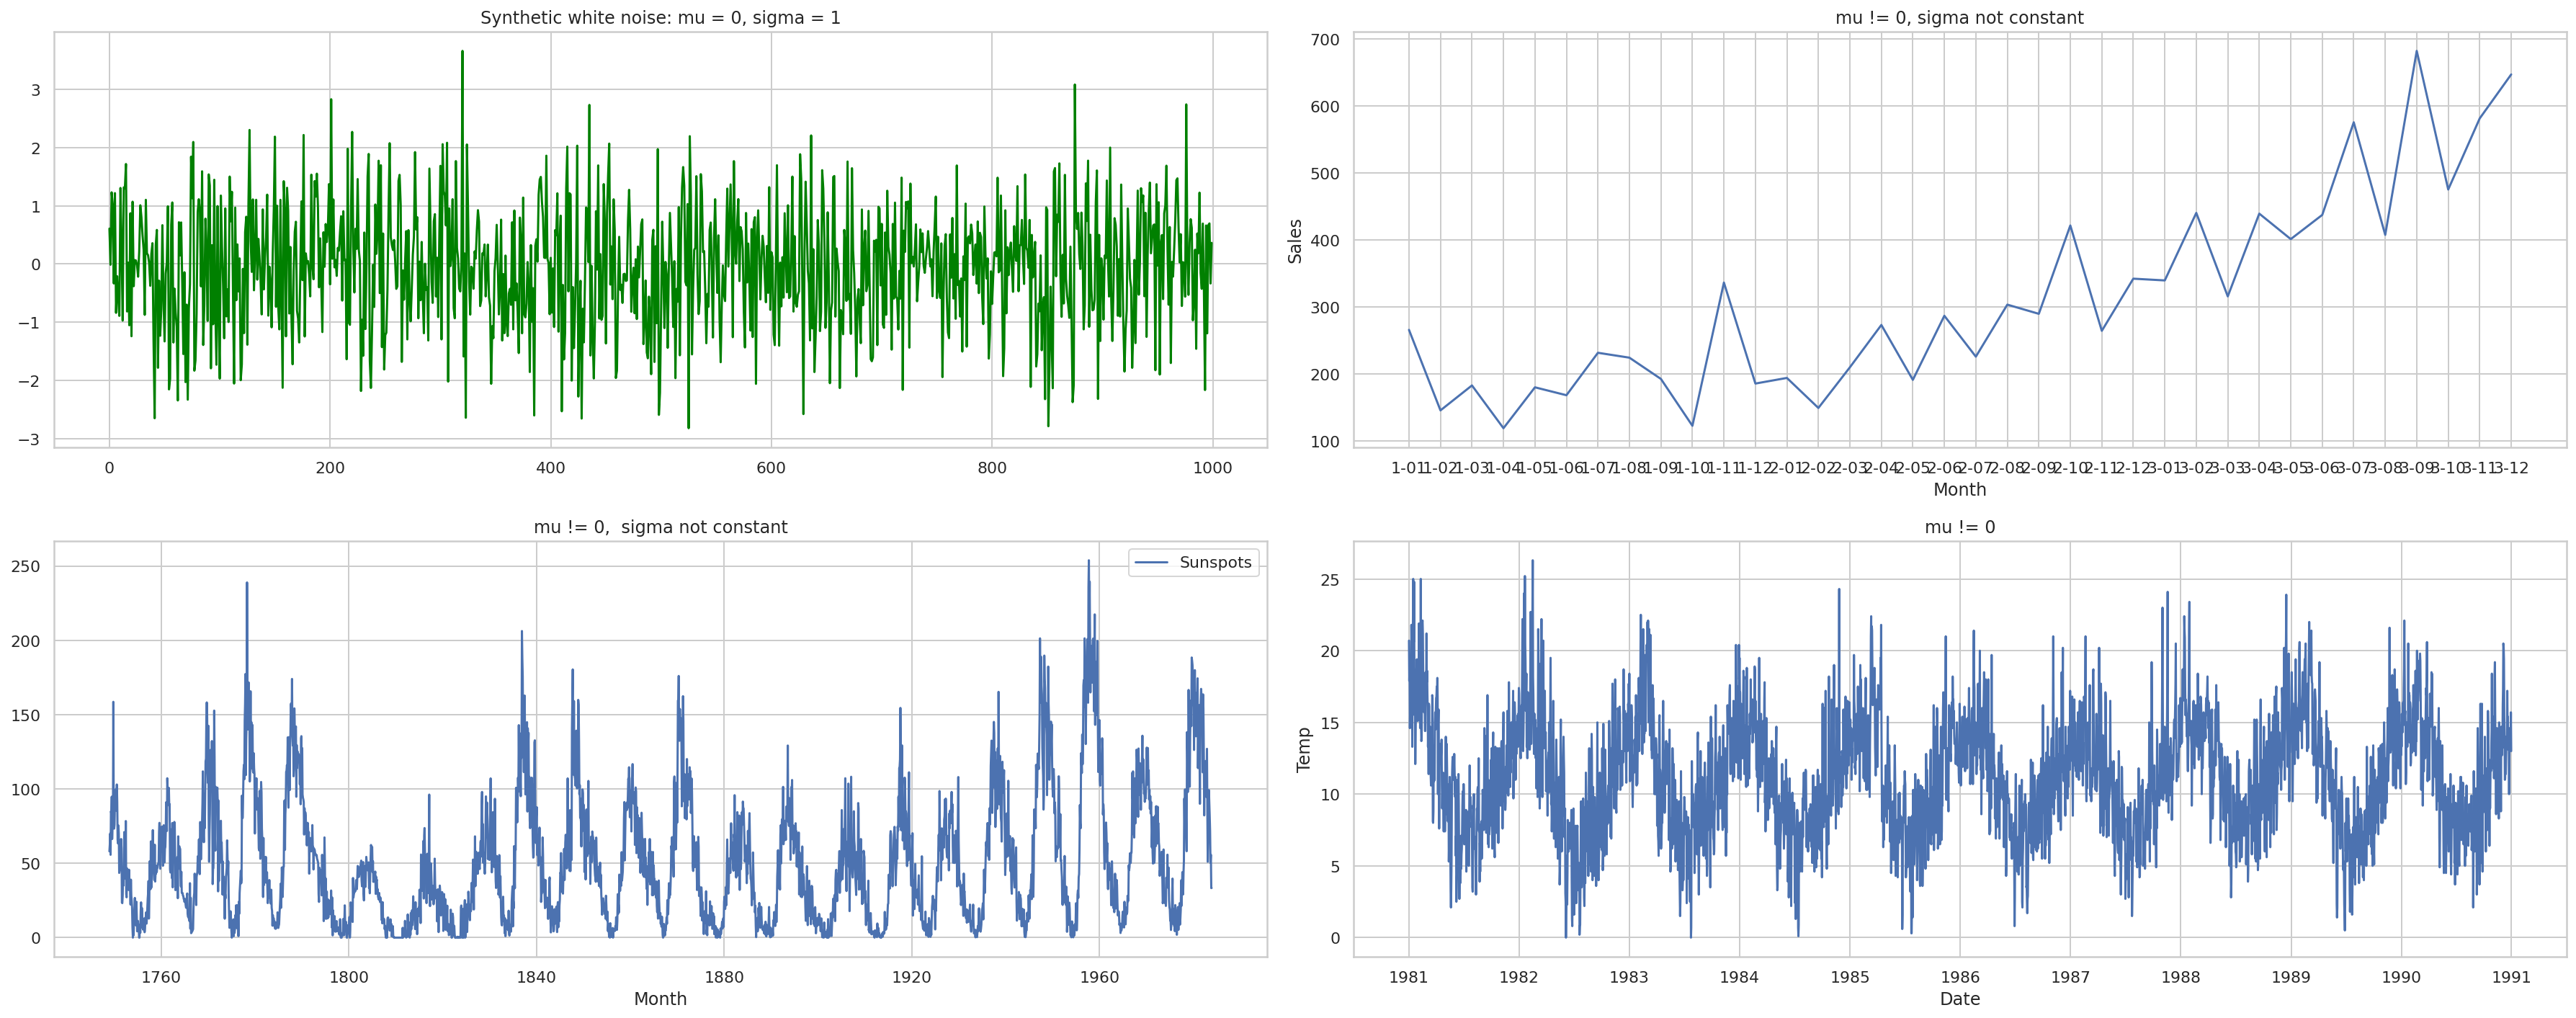

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,10))

sns.lineplot(data= synthetic_wn, ax= ax1, color = 'green'); ax1.set_title('Synthetic white noise: mu = 0, sigma = 1');
sns.lineplot(data= shampoo_sales, ax= ax2); ax2.set_title('mu != 0, sigma not constant');
sns.lineplot(data= sunspots, ax= ax3);  ax3.set_title('mu != 0,  sigma not constant');
sns.lineplot(data= daily_temps, ax= ax4);  ax4.set_title('mu != 0');

plt.tight_layout()

### Autocorrelation

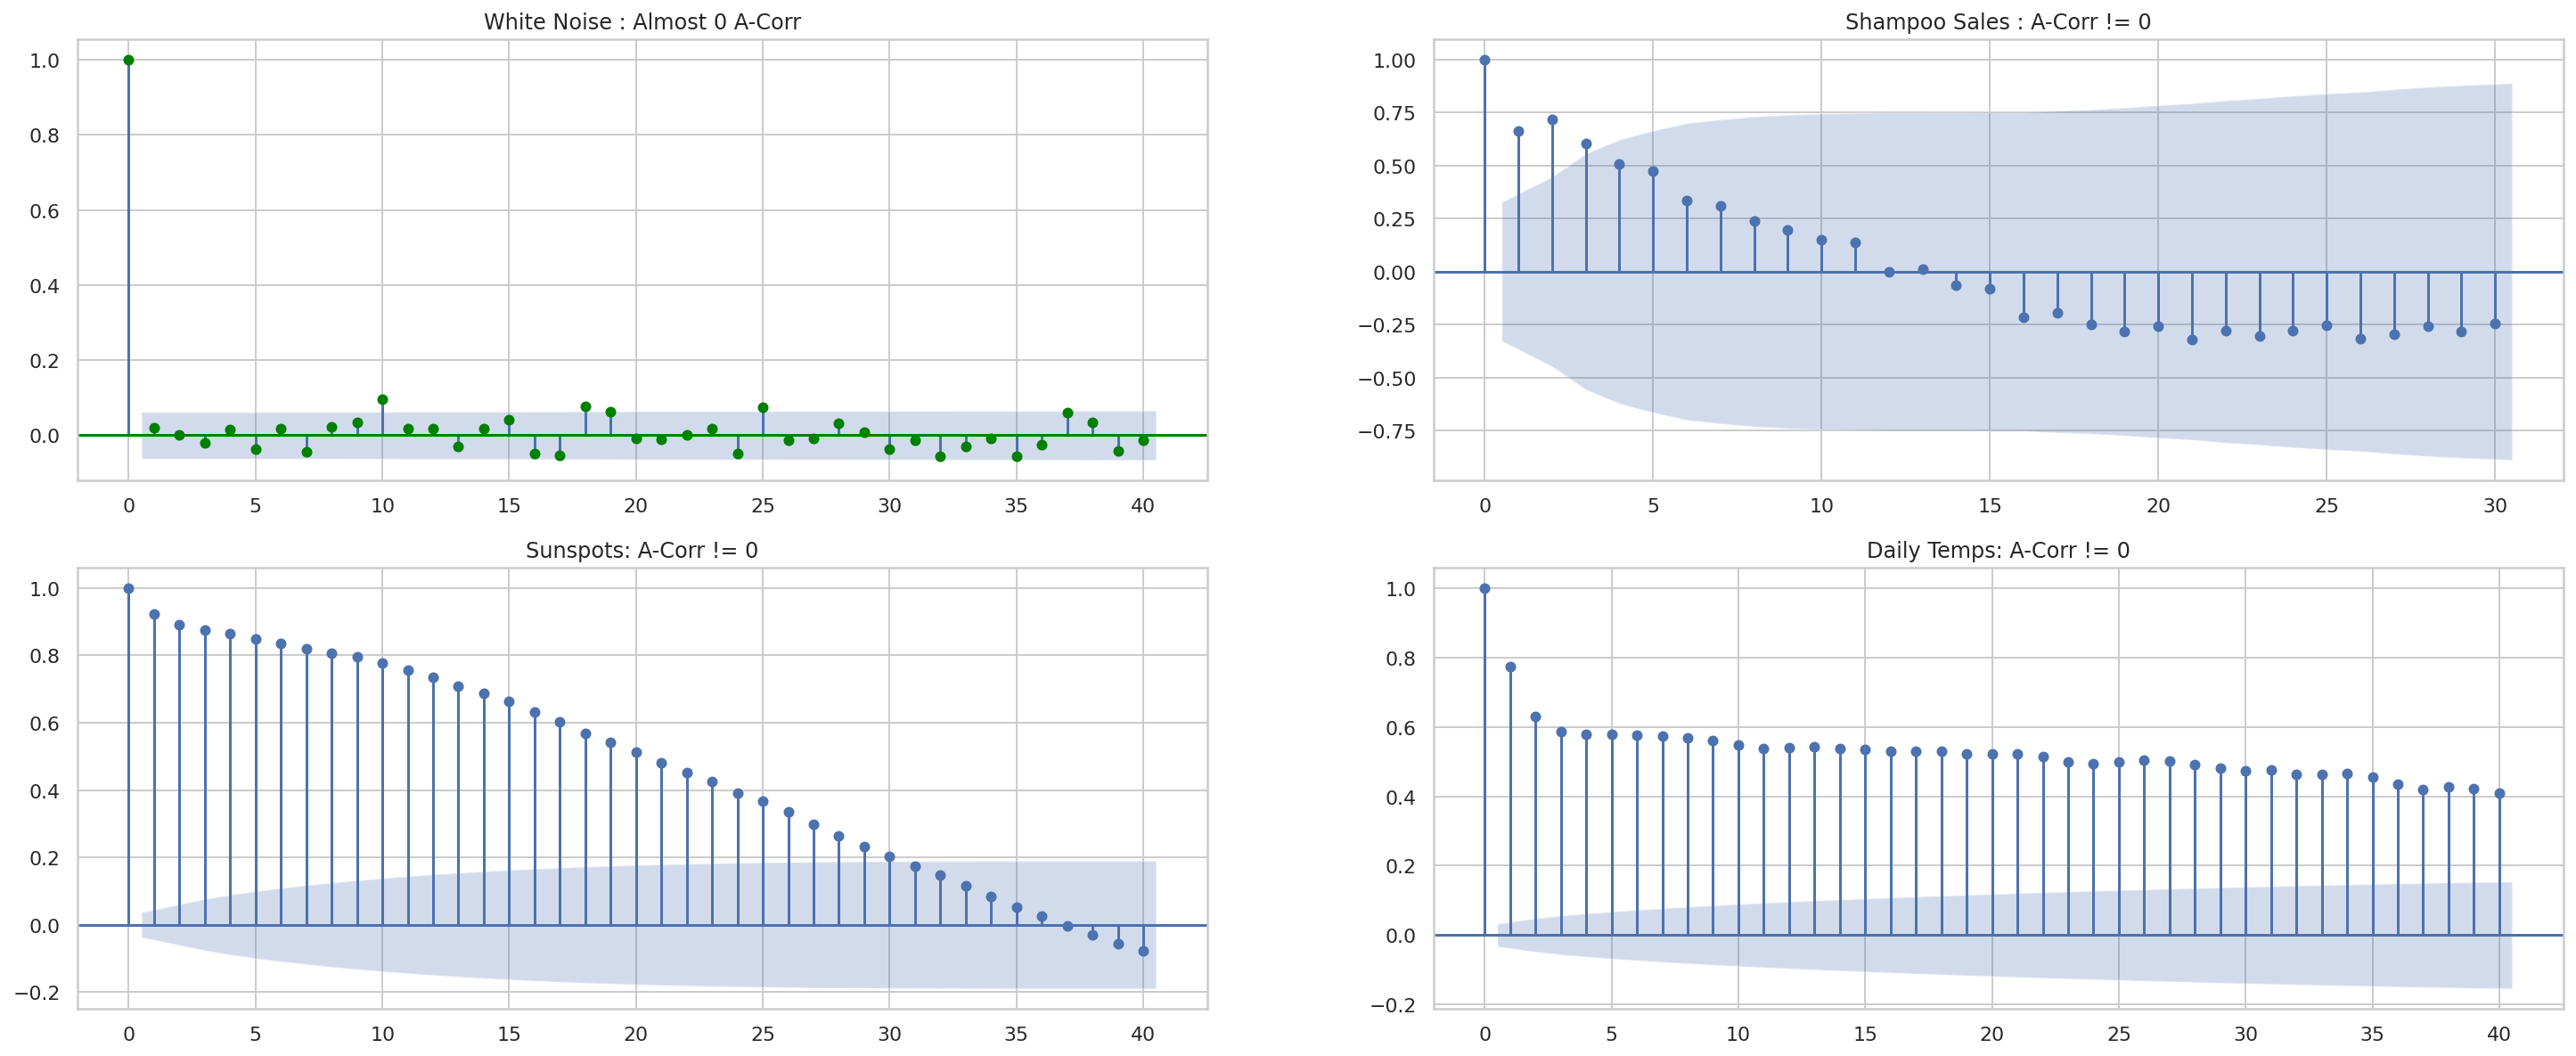

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25,10))

sm.graphics.tsa.plot_acf(synthetic_wn, lags=40, ax = ax1, color='green'); ax1.set_title('White Noise : Almost 0 A-Corr')
sm.graphics.tsa.plot_acf(shampoo_sales, lags=30, ax = ax2); ax2.set_title('Shampoo Sales : A-Corr != 0')
sm.graphics.tsa.plot_acf(sunspots, lags=40, ax = ax3); ax3.set_title('Sunspots: A-Corr != 0')
sm.graphics.tsa.plot_acf(daily_temps, lags=40, ax = ax4); ax4.set_title('Daily Temps: A-Corr != 0')
plt.show()

TODO: Uses in ML model quality

<font size = '20'>👽</font>